### Agora vamos iniciar a analise de regressão
Vamos fazer uma regrassão simples do banco de dados disponivel no curso. 
Primeiro baixar os dados diretamente do GitHub



In [1]:
import pandas as pd

# Link direto para o arquivo
housing_url = "https://raw.githubusercontent.com/JoseHeraldo/analisefinanceira/main/Housing.xlsx"

# Ler o arquivo Excel diretamente
df = pd.read_excel(housing_url)


# Mostrar as primeiras linhas
print(df.head())

# Informações gerais
print(df.info())

   House Price  House Size (sq.ft.) State  Number of Rooms  \
0      1116000                 1940    IN                8   
1       860000                 1300    IN                5   
2       818400                 1420    IN                6   
3      1000000                 1680    IN                7   
4       640000                 1270    IN                5   

   Year of Construction  
0                  2002  
1                  1992  
2                  1987  
3                  2000  
4                  1995  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   House Price           20 non-null     int64 
 1   House Size (sq.ft.)   20 non-null     int64 
 2   State                 20 non-null     object
 3   Number of Rooms       20 non-null     int64 
 4   Year of Construction  20 non-null     int64 
dtypes: int64(4), o

Tambem se pode salvar o arquivo em excel numa pasta. No exemplo abaixo.
E depois voce  pode salvar o mesmo em um novo df. 

In [2]:
import requests

# Link direto para o arquivo
housing_url = "https://raw.githubusercontent.com/JoseHeraldo/analisefinanceira/main/Housing.xlsx"

# Fazer o download do arquivo
response = requests.get(housing_url)
with open("Housing.xlsx", "wb") as file:
    file.write(response.content)

print("Arquivo baixado e salvo como 'Housing.xlsx'")


Arquivo baixado e salvo como 'Housing.xlsx'


Arquivo baixado e salvo como 'Housing.xlsx'

### Agora vamos as analises de regressão. 

In [3]:
df

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


Para facilitar a regressão vamos trabalhar apenas com duas colunas. House Price e House Size

In [4]:
print(df.columns)

Index(['House Price', 'House Size (sq.ft.)', 'State', 'Number of Rooms',
       'Year of Construction'],
      dtype='object')


In [5]:
selected_columns = df[['House Price', 'House Size (sq.ft.)']]
print(selected_columns.head())

   House Price  House Size (sq.ft.)
0      1116000                 1940
1       860000                 1300
2       818400                 1420
3      1000000                 1680
4       640000                 1270


Agora elaborar a equação. De uma forma bem explicativa

In [7]:
x = selected_columns['House Size (sq.ft.)']
y = selected_columns['House Price']

In [8]:
x

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [9]:
y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

Definidos quem sao X e Y. 
Vamos analisar o grafico de dispersão

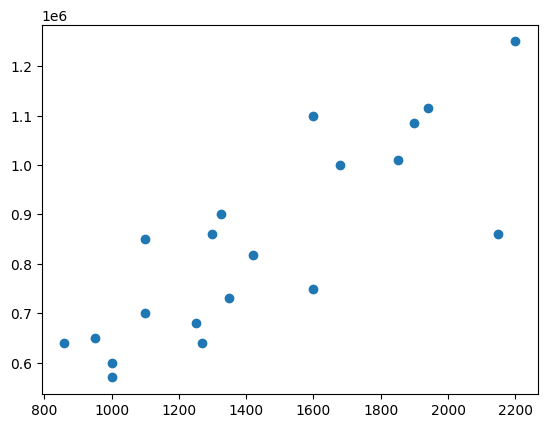

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()


Podemos mellhorar o ajustamento do grafico

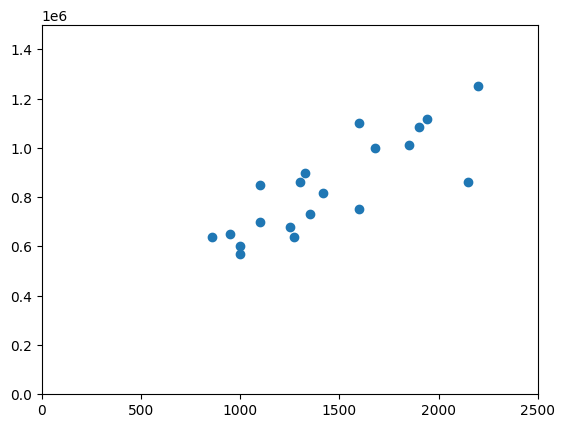

In [11]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.show()

Melhorando ainda mais o grafico, e deixando de forma profissional, ou seja, demonstrando a relação entre o tamanho de uma casa e seu preço. 

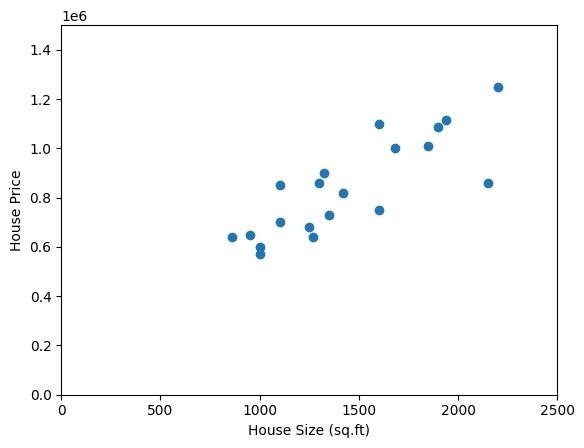

In [12]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

### Calculando o alfa, beta e o R quadrado

In [13]:
import statsmodels.api as sm

# Supondo que X e y sejam definidos corretamente
X1 = sm.add_constant(x)  # Adiciona uma constante (intercepto) ao modelo
reg = sm.OLS(y, X1).fit()  # Ajusta o modelo de regressão
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           8.13e-06
Time:                        21:19:30   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9

In [14]:
from scipy.stats import linregress

# Supondo que x e y já estão definidos corretamente
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Exibindo os resultados
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"Standard Error: {std_err}")

Slope: 401.91628631922595
Intercept: 260806.2360560964
R-squared: 0.678279986579124
Standard Error: 65.24299510636492


## Agora vamos iniciar uma regressão multicariada. 

Iremos usar a mesma base de dados da Holsing. encontrada no link abaixo. 

In [15]:
import pandas as pd
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Link direto para o arquivo
housing_url = "https://raw.githubusercontent.com/JoseHeraldo/analisefinanceira/main/Housing.xlsx"

# Ler o arquivo Excel diretamente
df = pd.read_excel(housing_url)


# Mostrar as primeiras linhas
print(df.head())

# Informações gerais
print(df.info())

   House Price  House Size (sq.ft.) State  Number of Rooms  \
0      1116000                 1940    IN                8   
1       860000                 1300    IN                5   
2       818400                 1420    IN                6   
3      1000000                 1680    IN                7   
4       640000                 1270    IN                5   

   Year of Construction  
0                  2002  
1                  1992  
2                  1987  
3                  2000  
4                  1995  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   House Price           20 non-null     int64 
 1   House Size (sq.ft.)   20 non-null     int64 
 2   State                 20 non-null     object
 3   Number of Rooms       20 non-null     int64 
 4   Year of Construction  20 non-null     int64 
dtypes: int64(4), o

In [16]:
X = df[['House Size (sq.ft.)','Number of Rooms', 'Year of Construction']]
Y = df['House Price']

In [17]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           6.82e-05
Time:                        21:42:17   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = df[['House Size (sq.ft.)', 'Number of Rooms']]
Y = df['House Price']

In [19]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           5.77e-05
Time:                        21:42:45   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lembrar de sempre testar as regressoes. Para obter o melhor resultado. Testar com diferentes variaveis é importante. 